<a href="https://colab.research.google.com/github/NEELANATARAJAN/pytorch_deeplearning/blob/main/projects/03_pytorch_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

# torchvisions

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# visualize
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [ ]:
# Getting dataset

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=None)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(), target_transform=None)


100%|██████████| 26.4M/26.4M [00:01<00:00, 21.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 341kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.22MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.90MB/s]


### 1.1 Input and output shapes of a computer vision model

In [ ]:
image, label = train_data[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
class_names[label]

'Ankle boot'

### 1.2 Visualizing our data

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

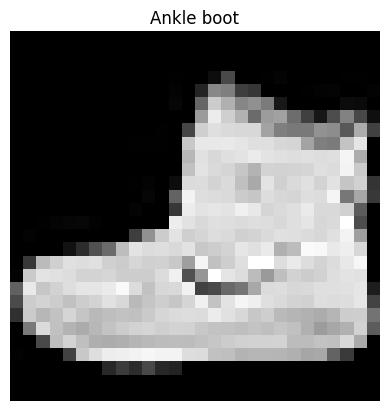

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


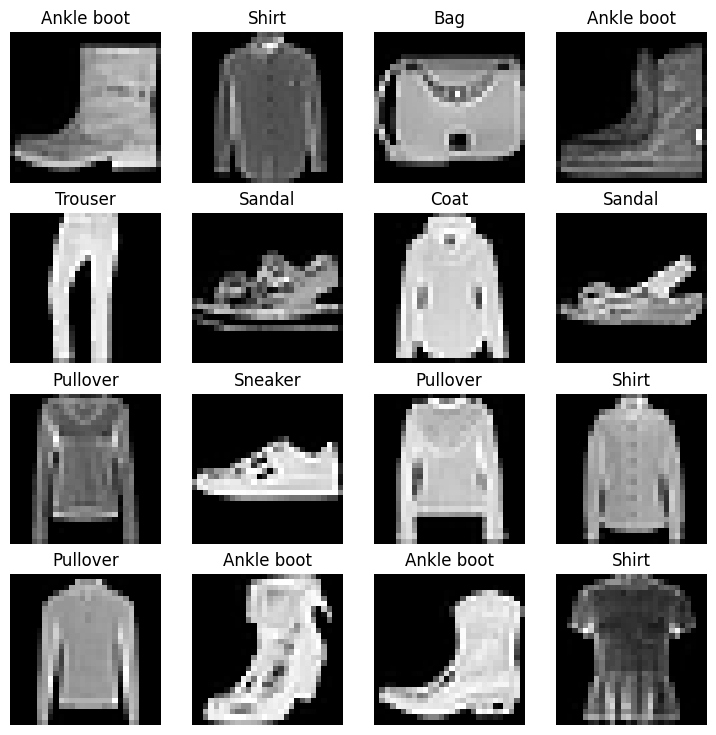

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx=torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
print(f"Image shape: {image.shape}")
print(f"Label shape: {label}")

Image shape: torch.Size([1, 28, 28])
Label shape: 6


In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} of Batch Size: {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} of Batch Size: {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e6c2b85bd90>, <torch.utils.data.dataloader.DataLoader object at 0x7e6c2b76ed10>)
Length of train dataloader: 1875 of Batch Size: 32
Length of test dataloader: 313 of Batch Size: 32


In [ ]:
train_batch_features, train_batch_labels = next(iter(train_dataloader))
print(f"Features batch shape: {train_batch_features.shape}")
print(f"Labels batch shape: {train_batch_labels.shape}")

Features batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


Image shape: torch.Size([1, 28, 28])
Label shape: 8


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

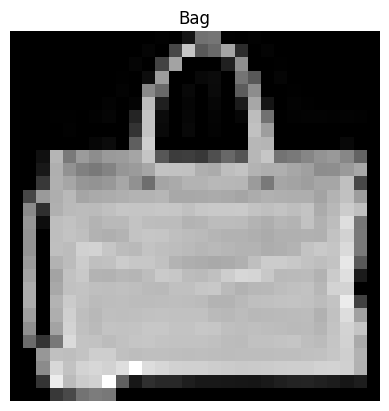

In [ ]:
#torch.manual_seed(123)
random_idx = torch.randint(0, len(train_batch_features), size=[1]).item()
img,  label = train_batch_features[random_idx], train_batch_labels[random_idx]
print(f"Image shape: {img.shape}")
print(f"Label shape: {label}")
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a baseline model

In [ ]:
flatten_model = nn.Flatten()

x = train_batch_features[0]
print(f"Shape before flatten: {x.shape}")
x = flatten_model(x)
print(f"Shape after flatten: {x.shape}")

Shape before flatten: torch.Size([1, 28, 28])
Shape after flatten: torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,28,28])
print(model_0(dummy_x))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)


In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss function optimizer and evaluation metrics

* Loss function - Since we're working with multi-class data, our loss function will be
`nn.CrossEntropyLoss()`.
* Optimizer - our optimizer would be `torch.optim.SGD()`
* Evaluation metric would be Accuracy metric `torchmetrics.Accuracy()`

In [ ]:
def acc_fn(y_true ,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
import requests
from pathlib import Path

# Download helper function in case it does not exists
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [ ]:
# Import accuracy function
from helper_functions import accuracy_fn

In [ ]:
# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments
1. Model's performance (loss, accuracy etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end times..."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds...")
  return total_time

In [ ]:
start_timer = timer()
# some code ...
end_timer = timer()
print_train_time(start=start_timer, end=end_timer, device='cpu')

Train time on cpu: 0.000 seconds...


3.1839000001809836e-05

### 3.3 Creating training and testing loop for the batches
1. Loop through the epochs
2. Loop through the training batches, perform training steps, calculate training loss
3. Loop through the testing batches, perform testing steps, calculate testing loss
4. Print out what's happening.
5. Time it all.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set timer and seed
torch.manual_seed(42)
train_timer_start_on_cpu = timer()

# Set epochs
epochs = 3

# Creating training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  ### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples...")

  # Divide the total train loss by the length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass for the test dataset
      test_pred = model_0(X_test)

      # Calculate the test loss
      test_loss += loss_fn(test_pred, y_test)

      # Calculate the test accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print what's happening
  print(f"\Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}")

# Calculate the training time
train_timer_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_timer_start_on_cpu,
                                                   end=train_timer_end_on_cpu,
                                                   device=next(model_0.parameters()).device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
\Train loss: 0.5904 | Test loss: 0.5095 | Test_acc: 82.0387
Epoch: 1
----
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
\Train loss: 0.4763 | Test loss: 0.4799 | Test_acc: 83.1969
Epoch: 2
----
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
\Train loss: 0.4550 | Test loss: 0.4766 | Test_acc: 83.4265
Train time on cpu: 33.970 seconds...


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make Predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing results of the model prediction on the dataloader..."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      # Forward pass
      test_pred = model(X)

      # Calculate accumalative loss and accuracy per batch
      loss += loss_fn(test_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_accuracy": acc}



In [ ]:
# Calculate model 0 results using eval_model function
model_0_results = eval_model(model=model_0,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

## 5. Setup device agnostic code (for using GPU is avaialble)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
      return self.layer_stack(x)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))
next(model_1.parameters())

Parameter containing:
tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
        [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
        [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
        ...,
        [-0.0344,  0.0127, -0.0325,  ..., -0.0011, -0.0230,  0.0257],
        [ 0.0291,  0.0243, -0.0006,  ...,  0.0001,  0.0176, -0.0147],
        [ 0.0053, -0.0194, -0.0170,  ...,  0.0205, -0.0093,  0.0283]],
       requires_grad=True)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and testing loops

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs training step to work on the dataloader """

  train_loss, train_acc = 0, 0

  # Putting model into training mode:
  print(f"Training model_name: {model.__class__.__name__}")

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    model.train()
    # Putting the data into device
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass
    y_pred = model(X)

    # 2. Calculate the loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    accuracy = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    train_acc += accuracy

    # 3. Optimizer zero_grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer stepup
    optimizer.step()

    # Print what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples...")

  # Average training loss and accuracy
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")






In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  """ Performs the test step for the model... """

  test_loss, test_acc = 0,0

  # Putting model in test stage
  print(f"Testing model_name: {model.__class__.__name__}")
  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for X, y in data_loader:
      # Sending the data to device
      X, y = X.to(device), y.to(device)

      # 1. Forward Pass
      test_pred = model(X)

      # 2. Calculate loss and accuracy
      loss = loss_fn(test_pred, y)
      test_loss += loss
      accuracy = accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
      test_acc += accuracy

    # Average loss and accuracy
    test_loss /=len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [ ]:
torch.manual_seed(42)

# Measure Time
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

# Transfer the model and dataloader to device
model_1.to(device)
#train_dataloader.to(device)
#test_dataloader.to(device)

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}...\n")

  # Training the model for each batch
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=torch.optim.SGD(params=model_1.parameters()),
             accuracy_fn=accuracy_fn,
             device=device)

  # Testing the model for each batch
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  print("\n")
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0...

Training model_name: FashionMNISTModelV1
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
Train loss: 2.23097 | Train accuracy: 20.97%
Testing model_name: FashionMNISTModelV1
Test loss: 2.14713 | Test accuracy: 29.90%



Epoch: 1...

Training model_name: FashionMNISTModelV1
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
Train loss: 2.01645 | Train accuracy: 36.85%
Testing model_name: FashionMNISTModelV1
Test loss: 1.89601 | Test accuracy: 44.61%



Epoch: 2...

Training model_name: FashionMNISTModelV1
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
Train loss: 1.75600 | Train accuracy: 48.00%
Testing model_name: FashionMNISTModelV1
Test los

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

In [ ]:
model_1_results = eval_model(model=model_1,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.6359118223190308,
 'model_accuracy': 48.98162939297124}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_blk_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_blk_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x: torch.Tensor):
    x = self.conv_blk_1(x)
    # print(f"conv block 1:{x.shape}")
    x = self.conv_blk_2(x)
    # print(f"conv block 2:{x.shape}")
    x = self.classifier(x)
    # print(f"classifier:{x.shape}")
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (conv_blk_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_blk_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

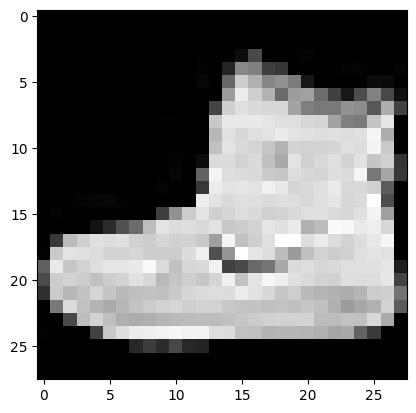

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
print(f"Image shape: {image.shape}")
model_2(image.unsqueeze(0))

Image shape: torch.Size([1, 28, 28])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

In [ ]:
rand_tensor_flat = torch.rand(size=(1,10,7,7))
print(rand_tensor_flat.shape)
flat_layer = nn.Flatten()
flat_tensor = flat_layer(rand_tensor_flat)
print(flat_tensor.shape)

torch.Size([1, 10, 7, 7])
torch.Size([1, 490])


In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Test image shape: {test_image.shape}")
#print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Test image shape: torch.Size([3, 64, 64])


In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=5,
                       stride=2,
                       padding=0)
conv_output = conv_layer(test_image)

In [ ]:
conv_output.shape

torch.Size([10, 30, 30])

In [ ]:
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_output = max_pool_layer(random_tensor)
print(f"\nMax pool output: {max_pool_output}")
print(f"Max pool tensor shape: {max_pool_output.shape}")


Random tensor: tensor([[[[-1.4381,  0.5058],
          [ 0.3886,  1.2836]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool output: tensor([[[[1.2836]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Measure the time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}... \n")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  print("\n")
train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0... 

Training model_name: FashionMNISTModelV2
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
Train loss: 0.59518 | Train accuracy: 78.38%
Testing model_name: FashionMNISTModelV2
Test loss: 0.39500 | Test accuracy: 85.99%



Epoch : 1... 

Training model_name: FashionMNISTModelV2
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
Train loss: 0.36536 | Train accuracy: 86.90%
Testing model_name: FashionMNISTModelV2
Test loss: 0.35244 | Test accuracy: 86.91%



Epoch : 2... 

Training model_name: FashionMNISTModelV2
Looked at 0/60000 samples...
Looked at 12800/60000 samples...
Looked at 25600/60000 samples...
Looked at 38400/60000 samples...
Looked at 51200/60000 samples...
Train loss: 0.32588 | Train accuracy: 88.13%
Testing model_name: FashionMNISTModelV2
Te

In [ ]:
model_2_results = eval_model(model=model_2,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,1.635912,48.981629
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Adding the training time for results comparison

compare_results['training_time'] = [total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]

In [ ]:
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.476639,83.426518,33.969912
1,FashionMNISTModelV1,1.635912,48.981629,35.156755
2,FashionMNISTModelV2,0.327190,88.069089,181.899074


Text(0, 0.5, 'model_name')

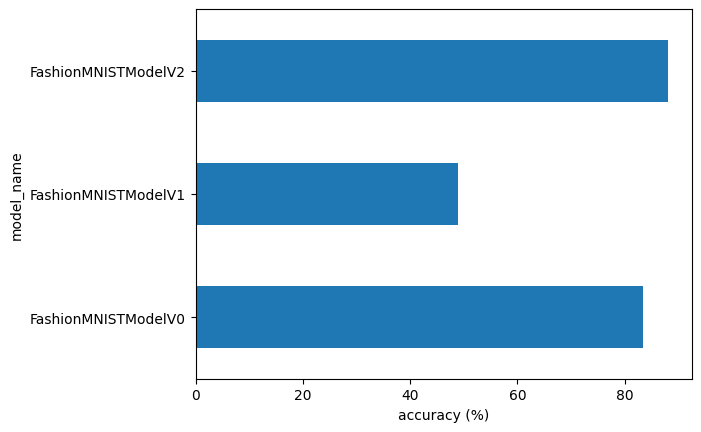

In [ ]:
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model_name")

In [ ]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Prediction probability from raw logits
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Add to the list
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'True label: Sneaker')

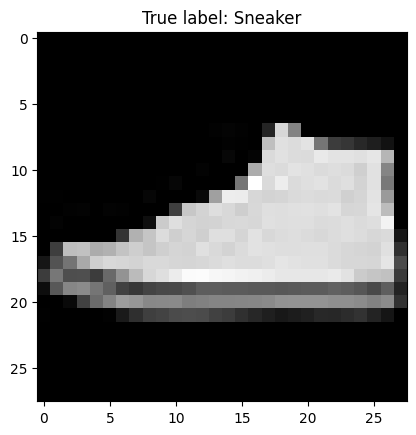

In [ ]:
plt.imshow(test_samples[1].squeeze(), cmap="gray")
plt.title(f'True label: {class_names[test_labels[1]]}')


In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[1.2569e-04, 1.2576e-05, 1.3161e-04, 3.1947e-04, 4.3169e-05, 1.3441e-02,
         3.8095e-05, 1.4858e-02, 3.0994e-02, 9.4004e-01],
        [8.4049e-05, 5.8252e-06, 5.0293e-05, 4.0283e-05, 1.6245e-05, 2.1705e-03,
         1.5887e-05, 9.4965e-01, 2.8492e-03, 4.5119e-02]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(test_labels)

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])
[9, 7, 2, 0, 1, 0, 4, 5, 4]


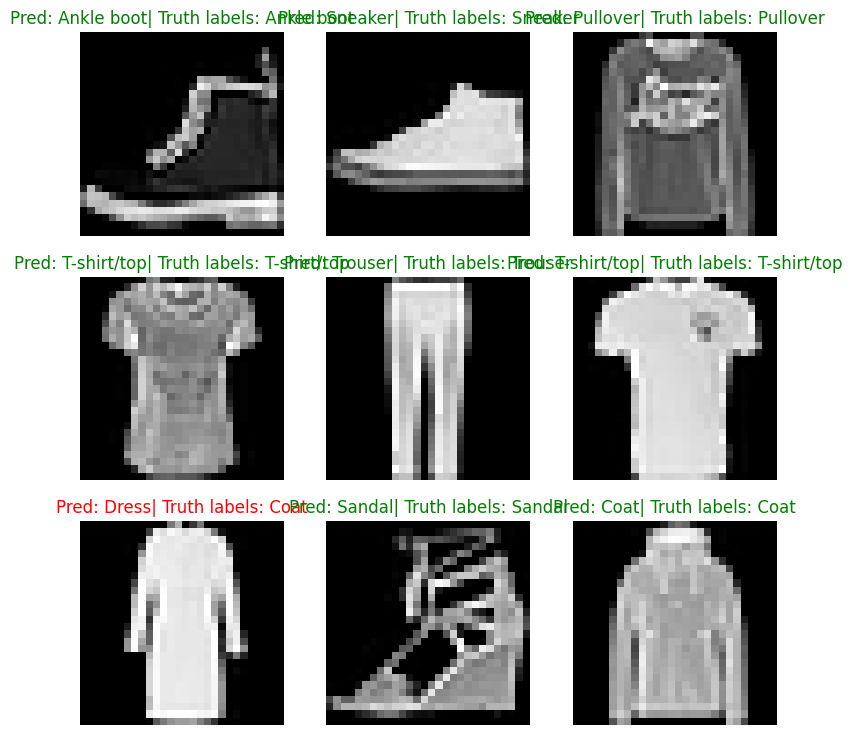

In [ ]:
plt.figure(figsize=(9,9))
nrows, ncols = 3,3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  title_text = f"Pred: {class_names[pred_classes[i]]}| Truth labels: {class_names[test_labels[i]]}"
  plt.axis(False)
  if class_names[pred_classes[i]] == class_names[test_labels[i]]:
    plt.title(title_text, c="green")
  else:
    plt.title(title_text, c="red")



  1. Make Predictions
  2. Plot the confusion matrix

In [ ]:
from tqdm.auto import tqdm
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    y_logits = model_2(X)
    pred_prob = torch.softmax(y_logits.squeeze(), dim=0)
    y_pred = pred_prob.argmax(dim=1)
    y_preds.append(y_pred)

print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:40]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 9, 7, 5,
        1, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([8, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 8, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 6, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        6, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 2,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 9, 7, 5,
        1, 2, 6, 3, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9])

In [ ]:
!pip install mlxtend
import mlxtend
mlxtend.__version__

'0.23.4'

In [ ]:
print(mlxtend.__version__)

0.23.4


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import torchmetrics
torchmetrics.__version__

'1.7.1'

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])


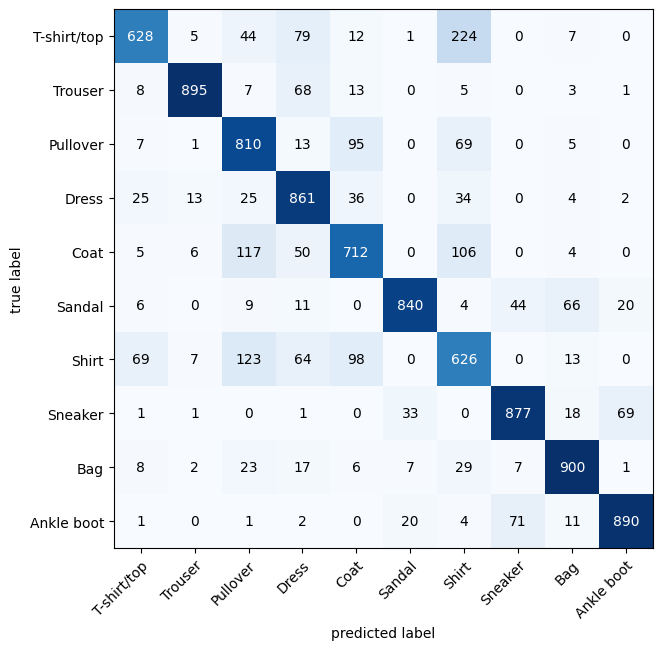

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare the predictions against targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

print(confmat_tensor)

# Plot the confusion matrix using the mlxtend
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7)
                                )

# Save and load the model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "3_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# Create new instance and load the saved model

torch.manual_seed(42)
loaded_model = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=10)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)


FashionMNISTModelV2(
  (conv_blk_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_blk_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [ ]:
# Evaluate the loaded model

torch.manual_seed(42)
loaded_model_results = eval_model(model=loaded_model,
                                  dataloader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)
loaded_model_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [ ]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_results['model_loss']),
              atol=1e-03)

tensor(True)